# Collaborative Filtering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
movie_titles_df = pd.read_csv('Movie_Id_Titles.csv')

In [3]:
movie_titles_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
# u.data 파일은 tab으로 되어 있음 (tsv형식)
#movies_rating_df =
# 컬럼명이 u.data 파일에는 없으므로 컬럼명도 만들어 준다
movie_rating_df = pd.read_csv('u.data', sep='\t', names=[ 'user_id', 'item_id', 'rating', 'timestamp'] )

In [7]:
movie_rating_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [ ]:
# 필요한 컬럼만 추려내기

In [8]:
movie_rating_df.drop('timestamp', axis=1, inplace=True)

In [9]:
movie_rating_df

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


## df 합치기

In [14]:
# 공통컬럼 'item_id'로 합치기
movies_merged_df = pd.merge(movie_rating_df, movie_titles_df, on='item_id')

In [15]:
movies_merged_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


## groupby() 영화로 묶기

In [20]:
# groupby()를 한 후 ['rating'] 컬럼만 분석
# 'title'컬럼을 unique()를 사용한 것 처럼 반복되는 것을 그룹화
movies_merged_df.groupby('title')['rating'].describe()


,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [ ]:
# 영화 타이틀별로 rating 컬럼의 평균값으로 그룹화

In [21]:
ratings_df_mean = movies_merged_df.groupby('title')['rating'].mean()

In [24]:
ratings_df_mean.head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

In [ ]:
# 영화별로 몇개의 데이터를 가지고 있는지 

In [27]:
# 이 방법은 간단하지만 title컬럼명이 안나와서 합칠때 join으로는 안됨
ratings_df_count = movies_merged_df.title.value_counts()

Index(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)',
       'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)',
       'Air Force One (1997)', 'Independence Day (ID4) (1996)',
       ...
       'War at Home, The (1996)', 'T-Men (1947)', 'Mostro, Il (1994)',
       'Silence of the Palace, The (Saimt el Qusur) (1994)',
       'Lashou shentan (1992)',
       'Police Story 4: Project S (Chao ji ji hua) (1993)', 'Ripe (1996)',
       'Quartier Mozart (1992)', 'He Walked by Night (1948)',
       'Normal Life (1996)'],
      dtype='object', length=1664)

## concat() 합치기

In [32]:
# concat()합치기
rating_mean_count = pd.concat( [ratings_df_count, ratings_df_mean], axis=1)

In [33]:
rating_mean_count

,title,rating
Star Wars (1977),584,4.359589
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701
...,...,...
Police Story 4: Project S (Chao ji ji hua) (1993),1,1.000000
Ripe (1996),1,2.000000
Quartier Mozart (1992),1,1.000000
He Walked by Night (1948),1,4.000000


In [35]:
#컬럼명 바꾸기
rating_mean_count.rename( {'title': 'count', 'rating': 'mean'} )

,title,rating
Star Wars (1977),584,4.359589
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701
...,...,...
Police Story 4: Project S (Chao ji ji hua) (1993),1,1.000000
Ripe (1996),1,2.000000
Quartier Mozart (1992),1,1.000000
He Walked by Night (1948),1,4.000000


In [37]:
# 컬럼명이 같아서 안될 때는 columns속성 이용하기
rating_mean_count.columns = ['count', 'mean']

In [38]:
rating_mean_count

,count,mean
Star Wars (1977),584,4.359589
Contact (1997),509,3.803536
Fargo (1996),508,4.155512
Return of the Jedi (1983),507,4.007890
Liar Liar (1997),485,3.156701
...,...,...
Police Story 4: Project S (Chao ji ji hua) (1993),1,1.000000
Ripe (1996),1,2.000000
Quartier Mozart (1992),1,1.000000
He Walked by Night (1948),1,4.000000


## 히스토그램 plot(kind='hist')

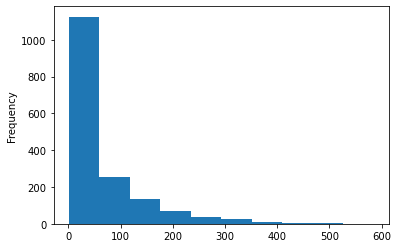

In [39]:
# count, mean 컬럼 각각 히스토그램 나타내기
rating_mean_count['count'].plot(kind='hist')
plt.show()

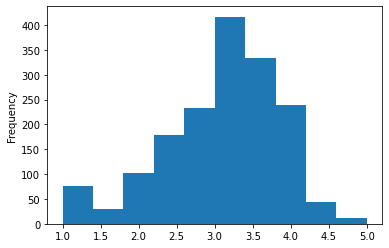

In [40]:
rating_mean_count['mean'].plot(kind='hist')
plt.show()

## 피봇 테이블 pivot_table()

In [42]:
movie_rating_df

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


In [49]:
# 컬럼 값을 row로 만들어 준다
# 처음의 df를 활용 (처음 합친 movies_merged_df)
userid_movieTitle_matrix = movies_merged_df.pivot_table(index='user_id', columns='title', values='rating')

In [50]:
userid_movieTitle_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## corrwith() 특정컬럼값 상관관계 분석

In [51]:
userid_movieTitle_matrix['2001: A Space Odyssey (1968)']

user_id
0      NaN
1      4.0
2      NaN
3      NaN
4      NaN
      ... 
939    NaN
940    NaN
941    NaN
942    3.0
943    NaN
Name: 2001: A Space Odyssey (1968), Length: 944, dtype: float64

In [52]:
# 특정 1컬럼 대 다수 컬럼 비교
userid_movieTitle_matrix.corrwith(userid_movieTitle_matrix['2001: A Space Odyssey (1968)'] )

title
'Til There Was You (1997)               -0.426401
1-900 (1994)                            -0.981981
101 Dalmatians (1996)                   -0.043407
12 Angry Men (1957)                      0.178848
187 (1997)                              -0.554700
                                           ...   
Young Guns II (1990)                    -0.154765
Young Poisoner's Handbook, The (1995)   -0.341753
Zeus and Roxanne (1997)                 -1.000000
unknown                                  0.000000
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [54]:
# corrwith()한 결과를 저장
a_space_odyssey_series = userid_movieTitle_matrix.corrwith(userid_movieTitle_matrix['2001: A Space Odyssey (1968)'] )


In [56]:
a_space_odyssey_series.shape

(1664,)

In [57]:
# 위의 데이터는 시리즈로 되어 있기 때문에 dataFrame으로 만들어준다
odyssey_correlations = pd.DataFrame(data= a_space_odyssey_series, columns=['Correlation'] )

In [61]:
odyssey_correlations.head()

,Correlation
title,
'Til There Was You (1997),-0.426401
1-900 (1994),-0.981981
101 Dalmatians (1996),-0.043407
12 Angry Men (1957),0.178848
187 (1997),-0.554700


In [59]:
odyssey_correlations.shape

(1664, 1)

In [ ]:
# 기존 rating_mean_count의 'count'를 가지고 와서 합쳐준다
# 그래야지 신뢰성이 있는 dataFrame이 된다

join() 합치기

In [63]:
odyssey_correlations = odyssey_correlations.join( rating_mean_count['count'] )

In [65]:
odyssey_correlations.head()

,Correlation,count
title,,
'Til There Was You (1997),-0.426401,9
1-900 (1994),-0.981981,5
101 Dalmatians (1996),-0.043407,109
12 Angry Men (1957),0.178848,125
187 (1997),-0.554700,41


In [ ]:
# NaN 제거

In [67]:
odyssey_correlations.dropna(inplace=True)

In [ ]:
# 정렬해서, 카운트가 80명 이상인 데이터만 가져오기

In [70]:
odyssey_correlations_80 = odyssey_correlations.loc [ odyssey_correlations['count'] >= 80, ]

In [71]:
odyssey_correlations_80.head()

,Correlation,count
title,,
101 Dalmatians (1996),-0.043407,109
12 Angry Men (1957),0.178848,125
2 Days in the Valley (1996),0.332724,93
2001: A Space Odyssey (1968),1.000000,259
Absolute Power (1997),-0.241580,127


In [73]:
# 상관관계가 높은 순으로 정렬 5개 (상관관계1인 자신은 제외)
odyssey_correlations_80.sort_values(by='Correlation', ascending=False).head(6)

,Correlation,count
title,,
2001: A Space Odyssey (1968),1.000000,259
True Romance (1993),0.459189,104
Natural Born Killers (1994),0.442248,128
Being There (1979),0.425009,116
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),0.392916,194
"Clockwork Orange, A (1971)",0.388071,221


## 특정 컬럼명 찾기 str.lower().to_frame() 이용

In [ ]:
# 예를 들어 영화 star wars를 찾을려고 할 때 정확한 컬럼명은 알 수 없는 상황에서
# 물론csv파일을 검색해봐도 되겠지만...;;; 데이터프레임에서 확인할 수 있는 방법

In [74]:
userid_movieTitle_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# userid_movieTitle_matrix 는 컬럼명으로 각 영화 타이틀로 들어가져 있어서 찾기가 곤란
# 그래서 기존의 title이 들어간 데이터프레임으로 찾아본다

In [75]:
# 기존의 타이틀이 들어간 df를 활용
movie_titles_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [79]:
movie_titles_df['title'].str.lower()

0                                toy story (1995)
1                                goldeneye (1995)
2                               four rooms (1995)
3                               get shorty (1995)
4                                  copycat (1995)
                          ...                    
1677                            mat' i syn (1997)
1678                             b. monkey (1998)
1679                         sliding doors (1998)
1680                          you so crazy (1994)
1681    scream of stone (schrei aus stein) (1991)
Name: title, Length: 1682, dtype: object

In [80]:
# 위의 결과를 데이터프레임으로 보기 to_frame()
# 이렇게 하는 이유는 시리즈 데이터에서는 contains()를 이용해서 특정 문자열 찾기가 어려워서 
my_title_df = movie_titles_df['title'].str.lower().to_frame()

In [82]:
my_title_df['title'].str.contains('star wars')

0       False
1       False
2       False
3       False
4       False
        ...  
1677    False
1678    False
1679    False
1680    False
1681    False
Name: title, Length: 1682, dtype: bool

In [83]:
my_title_df.loc [ my_title_df['title'].str.contains('star wars'), ]

,title
49,star wars (1977)


In [85]:
# 위의 흐름을 좀 더 짧게 하면 
my_star_was_title = movie_titles_df.loc [ movie_titles_df['title'].str.lower().to_frame()\
    ['title'].str.contains('star wars'), ]

In [86]:
my_star_was_title

,item_id,title
49,50,Star Wars (1977)


위의 찾은 결과로 다시 correlation을 df를 만들어서 하면됨